In [1]:
import yfinance as yf

In [45]:
df=yf.download("TATASTEEL.NS",start="2025-01-01",end="2026-01-23")

[*********************100%***********************]  1 of 1 completed


In [46]:
df.head(2)

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2025-01-01,133.623825,135.294847,133.467468,134.952833,18169498
2025-01-02,135.030991,135.294842,133.291556,133.877889,23388424


In [47]:
df.columns

MultiIndex([( 'Close', 'TATASTEEL.NS'),
            (  'High', 'TATASTEEL.NS'),
            (   'Low', 'TATASTEEL.NS'),
            (  'Open', 'TATASTEEL.NS'),
            ('Volume', 'TATASTEEL.NS')],
           names=['Price', 'Ticker'])

In [48]:
df.tail(2)

Price,Close,High,Low,Open,Volume
Ticker,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
Date,,,,,
2026-01-21,184.410004,185.710007,180.880005,183.559998,35037961
2026-01-22,189.100006,189.990005,185.789993,185.889999,35681682


In [49]:
df.columns=['_'.join(col).strip() for col in df.columns.values]

In [50]:
df.columns

Index(['Close_TATASTEEL.NS', 'High_TATASTEEL.NS', 'Low_TATASTEEL.NS',
       'Open_TATASTEEL.NS', 'Volume_TATASTEEL.NS'],
      dtype='object')

In [51]:
df

,Close_TATASTEEL.NS,High_TATASTEEL.NS,Low_TATASTEEL.NS,Open_TATASTEEL.NS,Volume_TATASTEEL.NS
Date,,,,,
2025-01-01,133.623825,135.294847,133.467468,134.952833,18169498
2025-01-02,135.030991,135.294842,133.291556,133.877889,23388424
2025-01-03,135.206894,136.545668,134.698740,135.030988,23351832
2025-01-06,129.167725,135.236211,128.356653,135.206895,44620509
2025-01-07,130.340393,130.828999,129.001604,129.754061,24239451
...,...,...,...,...,...
2026-01-16,188.210007,191.000000,187.309998,190.050003,26028519
2026-01-19,188.270004,189.440002,186.800003,187.100006,19709364
2026-01-20,183.559998,190.000000,183.029999,188.270004,20094927


In [52]:
#z-score  =  (X-mean)/std.deviation

In [53]:
df['z_score']=(df['Close_TATASTEEL.NS']-df['Close_TATASTEEL.NS'].mean())/df['Close_TATASTEEL.NS'].std()

In [54]:
df

,Close_TATASTEEL.NS,High_TATASTEEL.NS,Low_TATASTEEL.NS,Open_TATASTEEL.NS,Volume_TATASTEEL.NS,z_score
Date,,,,,,
2025-01-01,133.623825,135.294847,133.467468,134.952833,18169498,-1.336340
2025-01-02,135.030991,135.294842,133.291556,133.877889,23388424,-1.255143
2025-01-03,135.206894,136.545668,134.698740,135.030988,23351832,-1.244993
2025-01-06,129.167725,135.236211,128.356653,135.206895,44620509,-1.593465
2025-01-07,130.340393,130.828999,129.001604,129.754061,24239451,-1.525800
...,...,...,...,...,...,...
2026-01-16,188.210007,191.000000,187.309998,190.050003,26028519,1.813393
2026-01-19,188.270004,189.440002,186.800003,187.100006,19709364,1.816855
2026-01-20,183.559998,190.000000,183.029999,188.270004,20094927,1.545078


In [55]:
#Rules - for deviation converting to risk classes
#Z>1=High risk
#-1<=z<=1  = medium risk
#z<-1  = low risk

In [56]:
def classify_risk(z):
    if z>1:
        return "High"
    elif z<-1:
        return "Low"
    else:
        return "Medium"

In [57]:
df["Risk"]=df['z_score'].apply(classify_risk)

In [58]:
df

,Close_TATASTEEL.NS,High_TATASTEEL.NS,Low_TATASTEEL.NS,Open_TATASTEEL.NS,Volume_TATASTEEL.NS,z_score,Risk
Date,,,,,,,
2025-01-01,133.623825,135.294847,133.467468,134.952833,18169498,-1.336340,Low
2025-01-02,135.030991,135.294842,133.291556,133.877889,23388424,-1.255143,Low
2025-01-03,135.206894,136.545668,134.698740,135.030988,23351832,-1.244993,Low
2025-01-06,129.167725,135.236211,128.356653,135.206895,44620509,-1.593465,Low
2025-01-07,130.340393,130.828999,129.001604,129.754061,24239451,-1.525800,Low
...,...,...,...,...,...,...,...
2026-01-16,188.210007,191.000000,187.309998,190.050003,26028519,1.813393,High
2026-01-19,188.270004,189.440002,186.800003,187.100006,19709364,1.816855,High
2026-01-20,183.559998,190.000000,183.029999,188.270004,20094927,1.545078,High


In [59]:
tata_motors=df.reset_index()

In [60]:
tata_motors

,Date,Close_TATASTEEL.NS,High_TATASTEEL.NS,Low_TATASTEEL.NS,Open_TATASTEEL.NS,Volume_TATASTEEL.NS,z_score,Risk
0,2025-01-01,133.623825,135.294847,133.467468,134.952833,18169498,-1.336340,Low
1,2025-01-02,135.030991,135.294842,133.291556,133.877889,23388424,-1.255143,Low
2,2025-01-03,135.206894,136.545668,134.698740,135.030988,23351832,-1.244993,Low
3,2025-01-06,129.167725,135.236211,128.356653,135.206895,44620509,-1.593465,Low
4,2025-01-07,130.340393,130.828999,129.001604,129.754061,24239451,-1.525800,Low
...,...,...,...,...,...,...,...,...
262,2026-01-16,188.210007,191.000000,187.309998,190.050003,26028519,1.813393,High
263,2026-01-19,188.270004,189.440002,186.800003,187.100006,19709364,1.816855,High
264,2026-01-20,183.559998,190.000000,183.029999,188.270004,20094927,1.545078,High
265,2026-01-21,184.410004,185.710007,180.880005,183.559998,35037961,1.594125,High


In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

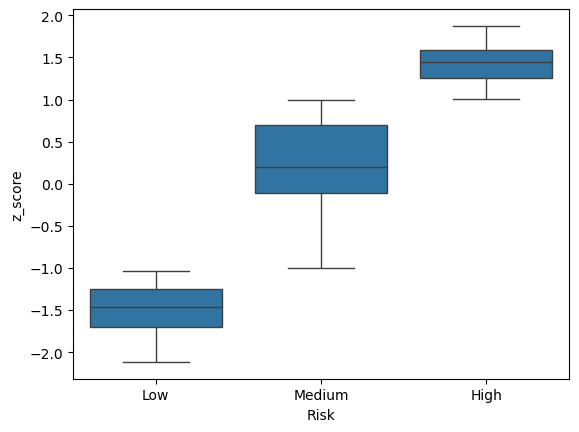

In [141]:
sns.boxplot(x='Risk', y='z_score', data=df)
plt.show()

In [ ]:
#High-risk days have higher z-scores

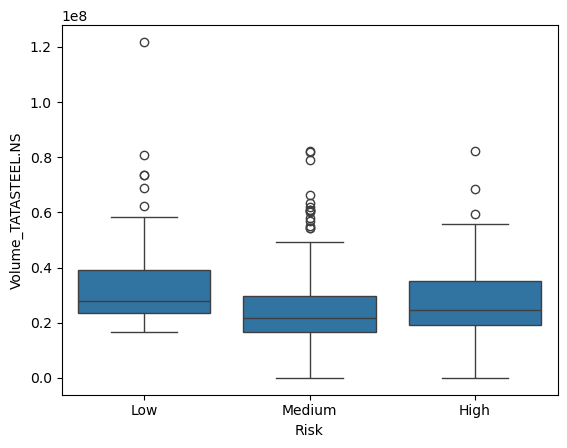

In [142]:
sns.boxplot(x='Risk', y='Volume_TATASTEEL.NS', data=df)
plt.show()

In [ ]:
#High volatility days tend to have higher trading volumes

In [67]:
X = df.drop('Risk', axis=1)
y = df['Risk']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
#KNN classification

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [92]:
from sklearn.neighbors import KNeighborsClassifier
def knn_classification(X_train,X_test,y_train,y_test):
    knn=KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    acc=accuracy_score(y_test,pred)
    return acc
acc_knn=knn_classification(X_train,X_test,y_train,y_test)
acc_knn

0.6790123456790124

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

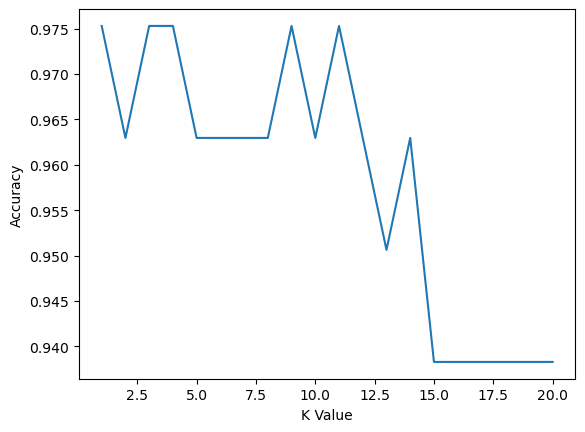

In [95]:
accuracy_list = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    accuracy_list.append(accuracy_score(y_test, pred))

plt.plot(range(1,21), accuracy_list)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

In [62]:
#Decision tree model

In [99]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)
pred_dt

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'High', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'High', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium'], dtype=object)

In [115]:
acc_dt=accuracy_score(y_test,pred_dt)
acc_dt

0.9629629629629629

In [116]:
cf_dt=confusion_matrix(y_test,pred_dt)
cf_dt

array([[ 8,  0,  0],
       [ 0, 20,  0],
       [ 2,  1, 50]])

In [117]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
5,z_score,0.552967
1,High_TATASTEEL.NS,0.447033
0,Close_TATASTEEL.NS,0.000000
2,Low_TATASTEEL.NS,0.000000
3,Open_TATASTEEL.NS,0.000000
4,Volume_TATASTEEL.NS,0.000000


In [63]:
#SVM

In [127]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train, y_train)
pred_svm=model_svm.predict(X_test)
pred_svm

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium'], dtype=object)

In [128]:
acc_svm=accuracy_score(y_test,pred_svm)
acc_svm

0.654320987654321

In [129]:
cf_svm=confusion_matrix(y_test,pred_svm)
cf_svm

array([[ 0,  0,  8],
       [ 0,  0, 20],
       [ 0,  0, 53]])

In [131]:
#Random Forest model

In [132]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf=model_rf.predict(X_test)
pred_rf

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Low', 'Low', 'Medium', 'Medium', 'High', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'High', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium'], dtype=object)

In [133]:
acc_rf=accuracy_score(y_test,pred_rf)
acc_rf

0.9753086419753086

In [134]:
cf_rf=confusion_matrix(y_test,pred)
cf_rf

array([[ 6,  0,  2],
       [ 0, 20,  0],
       [ 0,  3, 50]])

In [135]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
5,z_score,0.271477
0,Close_TATASTEEL.NS,0.240093
2,Low_TATASTEEL.NS,0.202699
3,Open_TATASTEEL.NS,0.144619
1,High_TATASTEEL.NS,0.141075
4,Volume_TATASTEEL.NS,0.000038


In [136]:
#Compare results

In [137]:
#Random Forest models achieved the highest accuracy of 97.5%, 
#the Random Forest model is preferred due to its robustness and balanced use of multiple price-related features. 
#The Decision Tree relied heavily on only two features, indicating potential overfitting.
#Random Forest, by aggregating predictions from multiple trees, provided more stable and generalizable predictions, 
#making it the better model for stock risk classification.

In [138]:
#SAVE THE MODEL

In [139]:
import joblib
joblib.dump(model_rf,'random_forest_model.joblib')
print("model saved")

model saved
